In [1]:
import pyreadr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
result = pyreadr.read_r('.\SurfCity_hab.rds')

In [4]:
df = result[None]
df['Habitat'].value_counts()
# 1) Nonwetland
# 2) PFO
# 3) E2EM
# 4) PSS
# 5) Water(E1UB)

1.0    61
2.0    38
3.0    30
5.0    15
4.0    13
Name: Habitat, dtype: int64

In [5]:
df['Wetland'] = np.where(df["Habitat"]==1.0, 0, 1)
df['Wetland'].value_counts()

1    96
0    61
Name: Wetland, dtype: int64

<AxesSubplot:>

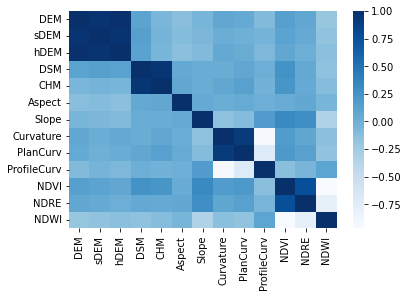

In [6]:
df_corr = df.drop(["Wetland", "Habitat", 'x', 'y'], axis=1)
corr = df_corr.corr()
sns.heatmap(corr, cmap="Blues")

In [7]:
wetland_corr = df.drop(['Habitat', 'x', 'y'], axis=1).corr()
df_corr = pd.DataFrame(wetland_corr['Wetland'])
df_corr = df_corr[:-1].sort_values(by=["Wetland"])
pd.set_option('display.max_rows', None)
df_corr

,Wetland
sDEM,-0.556397
DEM,-0.546673
hDEM,-0.546503
NDRE,-0.123180
NDVI,-0.084013
Curvature,-0.008798
DSM,0.035823
PlanCurv,0.038058
ProfileCurv,0.047995
CHM,0.073549
